<a href="https://colab.research.google.com/github/Maetamongminji/seminar_in_stats/blob/main/%ED%86%B5%EA%B3%84%ED%95%99%ED%8A%B9%EA%B0%95%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### __Installing packages and checking the data__

In [36]:
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [37]:
library(nycflights13)

In [38]:
library(tidyverse)

In [39]:
flights %>% head(5)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


### __Practicing dplyr functions(filter, select, …)__

### filter rows that match the condition - filter()

In [40]:
# distance가 1000보다 작고 dest가 ATL인 데이터 필터링하기

filter(flights, distance<1000, dest == "ATL") %>% head(5)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,600,600,0,837,825,12,MQ,4650,N542MQ,LGA,ATL,134,762,6,0,2013-01-01 06:00:00
2013,1,1,606,610,-4,837,845,-8,DL,1743,N3739P,JFK,ATL,128,760,6,10,2013-01-01 06:00:00
2013,1,1,615,615,0,833,842,-9,DL,575,N326NB,EWR,ATL,120,746,6,15,2013-01-01 06:00:00
2013,1,1,658,700,-2,944,939,5,DL,1547,N6703D,LGA,ATL,126,762,7,0,2013-01-01 07:00:00


In [41]:
# 1월 1일이면서 origin이 LGA 혹은 EWR인 데이터 필터링하기

flights %>% filter(month == 1 & day == 1 & origin %in% c('LGA','EWR')) %>% head(5) # 조건이 많은 경우 조건식이 복잡해지기 때문에 %>%를 이용하게 되면 조건만 filter() 안에 들어가게 할 수 있다.

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00


In [42]:
# 1월 1일이거나 1월 2일이면서 hour가 6시간 미만인 데이터 필터링하기

flights %>% filter(month == 1 & (day == 1 | day == 2) & hour<6) %>% head(3)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00


In [43]:
flights %>% filter(month == 1 & (day == 1 | day == 2) & hour<6) %>% tail(3) # 뒤에서부터 3개의 행을 확인해보았더니 1월 2일인 경우도 잘 포함되어 있음을 알 수 있었다. 

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,2,539,545,-6,959,1022,-23,B6,725,N624JB,JFK,BQN,184,1576,5,45,2013-01-02 05:00:00
2013,1,2,603,559,4,912,916,-4,UA,1676,N17229,EWR,LAX,341,2454,5,59,2013-01-02 05:00:00
2013,1,2,833,558,155,1018,727,171,UA,651,N448UA,EWR,ORD,129,719,5,58,2013-01-02 05:00:00


### Select columns that match the condition - select()

In [44]:
# dep_time, sched_dep_time 열 선택
select(flights, dep_time, sched_dep_time) %>% head(5)

dep_time,sched_dep_time
<int>,<int>
517,515
533,529
542,540
544,545
554,600


In [45]:
# year~day 열 선택
select(flights, (year:day)) %>% head(5)

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [46]:
# dep_time ~ arr_delay 열을 제외하고 선택
select(flights, -(dep_time:arr_delay)) %>% head(5)

year,month,day,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


In [47]:
# year~day 열과 column name이 time으로 끝나는 열 선택
flights %>% select(year:day, ends_with("time")) %>% head(5) 

year,month,day,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
2013,1,1,517,515,830,819,227
2013,1,1,533,529,850,830,227
2013,1,1,542,540,923,850,160
2013,1,1,544,545,1004,1022,183
2013,1,1,554,600,812,837,116


In [48]:
# fillter()과 select()를 동시에 이용하여 행과 열에 대한 조건에 맞는 데이터 선택하기
filter(select(flights, year:day), month==1) %>% head(5) 

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


### Add new variables with mutate()

In [49]:
# hour에 60을 곱하여 분으로 바꾸어준 뒤 minute과 더해 total_minute 이라는 새로운 변수를 만들었다.
# distance를 새로 만든 변수인 total_minute으로 나누어주어 dist_per_minute 이라는 새로운 변수를 만들었다.

flights %>% 
    mutate(total_minute = hour*60 + minute,
           dist_per_minute = distance/total_minute) %>% head(3)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,total_minute,dist_per_minute
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,315,4.444444
2013,1,1,533,529,4,850,830,20,UA,⋯,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,329,4.303951
2013,1,1,542,540,2,923,850,33,AA,⋯,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,340,3.202941


### Grouped summaries with summarise()


In [50]:
# origin 별로 departure delay의 평균 구하기
flights %>% group_by(origin) %>% 
summarise(delay = mean(dep_delay, na.rm = TRUE)) %>% head()

origin,delay
<chr>,<dbl>
EWR,15.10795
JFK,12.11216
LGA,10.34688


In [51]:
# dest 별로 arrival delay의 평균 구하기
flights %>% group_by(dest) %>% 
summarise(delay = mean(arr_delay, na.rm = TRUE)) %>% head()

dest,delay
<chr>,<dbl>
ABQ,4.381890
ACK,4.852273
ALB,14.397129
ANC,-2.500000
ATL,11.300113
AUS,6.019909


### __Visualization__

In [53]:
# 위에서 origin 별로 구한 departure delay의 평균을 origin_delay라는 변수에 저장한다.
origin_delay <- flights %>% group_by(origin) %>% 
summarise(delay = mean(dep_delay, na.rm = TRUE)) 

In [56]:
print(origin_delay)

# A tibble: 3 x 2
  origin delay
  <chr>  <dbl>
1 EWR     15.1
2 JFK     12.1
3 LGA     10.3


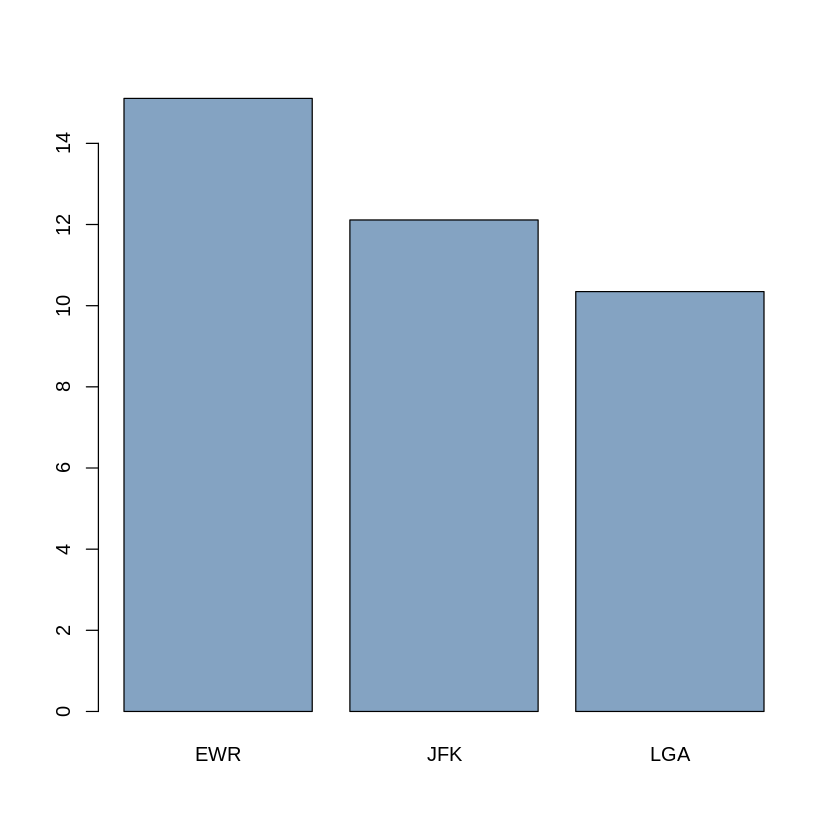

In [84]:
barplot(origin_delay$delay, names = origin_delay$origin, col=rgb(0.2,0.4,0.6,0.6))

origin 별로 delay되는 시간의 평균에 차이가 있다는 것을 알 수 있다.  
LGA, JFK, EWR 순으로 평균적인 delay 시간이 적다는 사실을 알 수 있었다.

In [80]:
# 위에서 dest 별로 구한 arrival delay의 평균을 dest_delay라는 변수에 저장한다. 
dest_delay <- flights %>% group_by(dest) %>%
summarise(delay = mean(arr_delay, na.rm = TRUE))

In [81]:
print(dest_delay)

# A tibble: 105 x 2
   dest  delay
   <chr> <dbl>
 1 ABQ    4.38
 2 ACK    4.85
 3 ALB   14.4 
 4 ANC   -2.5 
 5 ATL   11.3 
 6 AUS    6.02
 7 AVL    8.00
 8 BDL    7.05
 9 BGR    8.03
10 BHM   16.9 
# … with 95 more rows


Warning message:
“Removed 1 rows containing missing values (position_stack).”


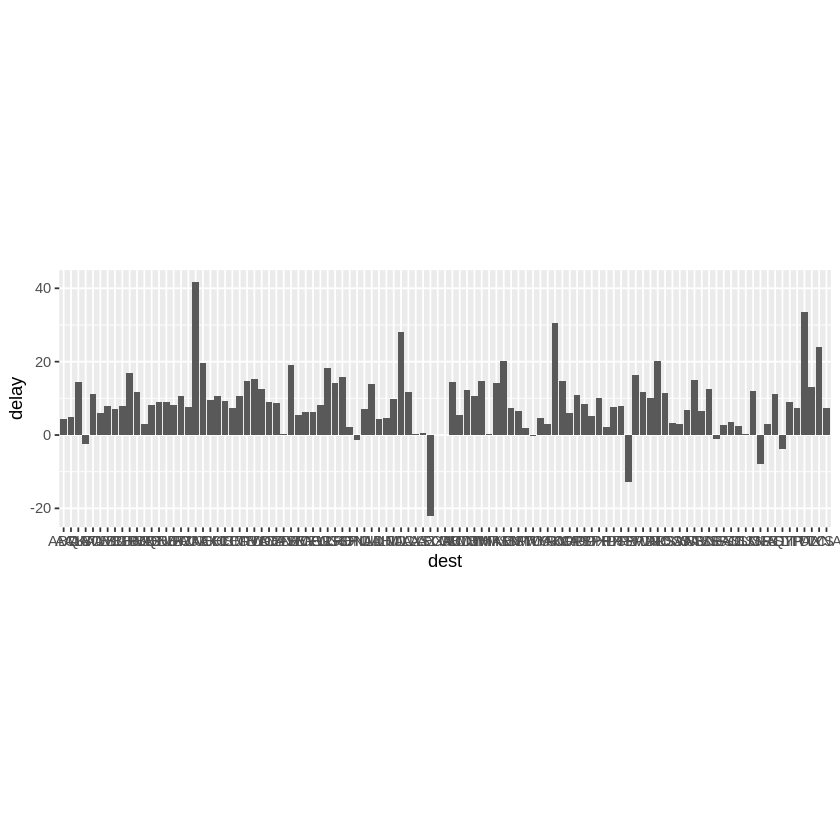

In [93]:
ggplot(dest_delay, aes(x=dest, y=delay)) + 
geom_bar(stat = "identity") +
coord_fixed(ratio=0.5)

destination 별로도 delay되는 시간의 평균에 차이가 있다는 사실을 알 수 있었다.